# CNNs with Tensorflow-Keras

In [49]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf

### Load and prepare the MNIST data

In [28]:
(X, y), (Xtest, ytest) = mnist.load_data()
print(X.shape, y.shape)

(60000, 28, 28) (60000,)


In [16]:
Ntrain=40000
Xtrain=X[:Ntrain]/255.
ytrain=y[:Ntrain]
Xvalid=X[Ntrain:]/255.
yvalid=y[Ntrain:]
Xtest=Xtest/255.

In [34]:
print(Xtest.shape)

(10000, 28, 28)


In [17]:
Xtrain=Xtrain.reshape(-1,28,28,1)
Xvalid=Xvalid.reshape(-1,28,28,1)
Xtest=Xtest.reshape(-1,28,28,1)

In [18]:
ytrainB=keras.utils.to_categorical(ytrain)
yvalidB=keras.utils.to_categorical(yvalid)
ytestB=keras.utils.to_categorical(ytest)

### Create model

In [26]:

lenet5 = models.Sequential()

lenet5.add(layers.Conv2D(6, (5, 5), activation='relu',input_shape=(28, 28, 1), padding="same"))
lenet5.add(layers.AveragePooling2D((2, 2)))
lenet5.add(layers.Conv2D(16, (5, 5), activation='relu'))
lenet5.add(layers.AveragePooling2D((2, 2)))
lenet5.add(layers.Conv2D(120, (1, 1), activation='relu'))
lenet5.add(layers.Flatten())
lenet5.add(layers.Dense(84, activation='relu'))
lenet5.add(layers.Dense(10, activation='softmax'))

In [27]:
lenet5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_6 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 5, 5, 120)         2040      
_________________________________________________________________
flatten_3 (Flatten)          (None, 3000)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 84)               

In [20]:
lenet5.compile(optimizer="nadam", loss="categorical_crossentropy", metrics=["accuracy"])

In [21]:
tLog = lenet5.fit(Xtrain, ytrainB, epochs=20,batch_size=1024, validation_data=(Xvalid, yvalidB))

Train on 40000 samples, validate on 20000 samples
Epoch 1/20
40000/40000 [==============================] - 10s 243us/sample - loss: 1.1583 - acc: 0.6798 - val_loss: 0.5281 - val_acc: 0.8145
Epoch 2/20
40000/40000 [==============================] - 9s 234us/sample - loss: 0.3342 - acc: 0.8981 - val_loss: 0.2998 - val_acc: 0.9077
Epoch 3/20
40000/40000 [==============================] - 9s 231us/sample - loss: 0.2262 - acc: 0.9330 - val_loss: 0.3713 - val_acc: 0.8801
Epoch 4/20
40000/40000 [==============================] - 10s 241us/sample - loss: 0.1877 - acc: 0.9438 - val_loss: 0.1785 - val_acc: 0.9451
Epoch 5/20
40000/40000 [==============================] - 9s 231us/sample - loss: 0.1441 - acc: 0.9571 - val_loss: 0.2588 - val_acc: 0.9115
Epoch 6/20
40000/40000 [==============================] - 9s 230us/sample - loss: 0.1314 - acc: 0.9601 - val_loss: 0.1386 - val_acc: 0.9566
Epoch 7/20
40000/40000 [==============================] - 9s 232us/sample - loss: 0.1036 - acc: 0.9683 - val

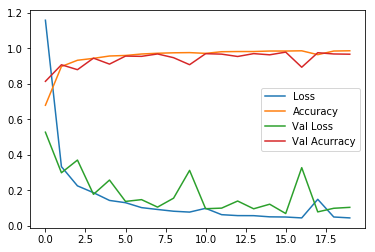

In [29]:
h=tLog.history
plt.plot(h["loss"], label='Loss')
plt.plot(h["acc"], label='Accuracy')
plt.plot(h["val_loss"], label='Val Loss')
plt.plot(h["val_acc"], label='Val Acurracy')
plt.legend()
plt.show()

In [40]:
print(h.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


# Avancado

In [41]:
from keras.applications.inception_resnet_v2 import InceptionResNetV2
CNN=InceptionResNetV2(weights='imagenet')

Using TensorFlow backend.




225214464/225209952 [==============================] - 11s 0us/step


In [45]:
from keras.applications.inception_resnet_v2 import decode_predictions
from keras.applications.inception_resnet_v2 import preprocess_input
import numpy as np

I=np.expand_dims(I, axis=0) # add extra dim.
I=preprocess(I)
preds=CNN.predict(I)
print('Predicted:', decode_predictions(preds, top=5))

NameError: name 'I' is not defined

In [50]:
#tf.keras.utils.get_file(origin="https://storage.googleapis.com/download.tensorflow.org/example images/flower photos.tgz", 
#  fname="flower photos", untar=True)

Exception: URL fetch failure on https://storage.googleapis.com/download.tensorflow.org/example images/flower photos.tgz: 400 -- Bad Request